# 6


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 10)
import re
import pymystem3
from bs4 import BeautifulSoup

In [2]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, fixed, FloatSlider

In [3]:
df_train = pd.read_csv('train.csv' ,sep ='\t' , index_col = 0)
df_train.head()

,name,description,target
id,,,
0,Заведующий отделом/секцией в магазин YORK (Уру...,<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) пр...,1
1,Наладчик станков и манипуляторов с ПУ,Обязанности:работа на токарных станках с ЧПУ T...,0
2,Разработчик С++ (Криптограф),<strong>Требования:</strong> <ul> <li>Опыт про...,0
3,Фрезеровщик,<p>Условия:</p> <ul> <li>На работу вахтовым ме...,0
4,Мерчендайзер/продавец-консультант,<p><strong>Компания Палладиум Стандарт - призн...,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 3 columns):
name           200000 non-null object
description    200000 non-null object
target         200000 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [5]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [6]:
df_train.loc[0, 'description']

'<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) приглашаем на постоянную работу руководителя секции (хозтовары).</strong></p> <p><strong>Обязанности: </strong></p> <p> </p> <ul> <li>организация эффективного и культурного обслуживания покупателей</li> <li>организация приемки-сдачи товаров на склад</li> <li>консультация покупателей по вопросам, касающимся оказываемых услуг</li> <li>контроль своевременной подачи товаров в торговую секцию</li> <li>проверка качества, сроков годности ТМЦ, наличие маркировок, ценников на товарах</li> <li>организация бесперебойной работы товарной секции и участка склада, закрепленного за ней</li> <li>контроль за сохранностью товаров, торгового оборудования и прочих материальных ценностей</li> <li>инвентаризация товаров</li> </ul> <p> </p> <p><strong>Требования:</strong></p> <ul> <li>знание товарной группы</li> <li>знание правил приемки товара</li> <li>опыт работы в розничной торговле в качестве продавца 6 р. / заместителя заведующего секцией/отделом</li> <li>отве

In [7]:
remove_html_tags(df_train.loc[0, 'description'])

'В НОВЫЙ МАГАЗИН YORK (хозтовары) приглашаем на постоянную работу руководителя секции (хозтовары). Обязанности:     организация эффективного и культурного обслуживания покупателей организация приемки-сдачи товаров на склад консультация покупателей по вопросам, касающимся оказываемых услуг контроль своевременной подачи товаров в торговую секцию проверка качества, сроков годности ТМЦ, наличие маркировок, ценников на товарах организация бесперебойной работы товарной секции и участка склада, закрепленного за ней контроль за сохранностью товаров, торгового оборудования и прочих материальных ценностей инвентаризация товаров    Требования:  знание товарной группы знание правил приемки товара опыт работы в розничной торговле в качестве продавца 6 р. / заместителя заведующего секцией/отделом ответственность, лидерские качества, опыт управления коллективом      Условия:  НОВЫЙ современный магазин розничной торговли хозтоварами хороший коллектив достойная зарплата, премии, соц.пакет график работы

In [21]:
type(remove_html_tags(df_train.loc[0, 'description']))

str

In [22]:
type(BeautifulSoup(df_train.loc[0, 'description'], 'lxml').text)

str

In [23]:
mystem = pymystem3.Mystem()

In [24]:
def my_tokenizer(text):
    lemms = mystem.lemmatize(text)
    lemms =[s.lower() for s in lemms if (len(s)>1)] 
    #lemms =[s for s in lemms if len(s)>1] 
    lemms = [x for x in lemms if re.match('[а-яё0-9a-z]+', x)]
    return " ".join([x for x in lemms])

In [25]:
my_tokenizer(BeautifulSoup(df_train.loc[0, 'description'], 'lxml').text)

'новый магазин york хозтовары приглашать на постоянный работа руководитель секция хозтовары обязанность организация эффективный культурный обслуживание покупатель организация приемка сдача товар на склад консультация покупатель по вопрос касаться оказывать услуга контроль своевременный подача товар торговый секция проверка качество срок годность тмц наличие маркировка ценник на товар организация бесперебойный работа товарный секция участок склад закреплять за она контроль за сохранность товар торговый оборудование прочий материальный ценность инвентаризация товар требование знание товарный группа знание правило приемка товар опыт работа розничный торговля качество продавец заместитель заведующий секция отдел ответственность лидерский качество опыт управление коллектив условие новый современный магазин розничный торговля хозтовары хороший коллектив достойный зарплата премия соц пакет график работа пн пт 8.00 до 16.30 плавать место работа ул никифоров уручей'

In [26]:
my_tokenizer(remove_html_tags(df_train.loc[0, 'description']))

'новый магазин york хозтовары приглашать на постоянный работа руководитель секция хозтовары обязанность организация эффективный культурный обслуживание покупатель организация приемка сдача товар на склад консультация покупатель по вопрос касаться оказывать услуга контроль своевременный подача товар торговый секция проверка качество срок годность тмц наличие маркировка ценник на товар организация бесперебойный работа товарный секция участок склад закреплять за она контроль за сохранность товар торговый оборудование прочий материальный ценность инвентаризация товар требование знание товарный группа знание правило приемка товар опыт работа розничный торговля качество продавец заместитель заведующий секция отдел ответственность лидерский качество опыт управление коллектив условие новый современный магазин розничный торговля хозтовары хороший коллектив достойный зарплата премия соц пакет график работа пн пт 8.00 до 16.30 плавать место работа ул никифоров уручей'

In [27]:
def check_eng(txt):
    return len( re.sub("[^A-Za-z]", "", txt.strip()) )

def check_word(txt , w='strong'):
    w='</'+w+'>'
    return txt.count(w)

In [28]:
df_train['w_strong'] = df_train['description'].apply(lambda row: check_word(row))
df_train['w_ul'] = df_train['description'].apply(lambda row: check_word(txt=row,w='ul'))

In [29]:
df_train.head()

,name,description,target,w_strong,w_ul
id,,,,,
0,Заведующий отделом/секцией в магазин YORK (Уру...,<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) пр...,1,5,4
1,Наладчик станков и манипуляторов с ПУ,Обязанности:работа на токарных станках с ЧПУ T...,0,0,0
2,Разработчик С++ (Криптограф),<strong>Требования:</strong> <ul> <li>Опыт про...,0,2,2
3,Фрезеровщик,<p>Условия:</p> <ul> <li>На работу вахтовым ме...,0,0,2
4,Мерчендайзер/продавец-консультант,<p><strong>Компания Палладиум Стандарт - призн...,1,4,3


In [30]:
def text_prep(txt):
    return my_tokenizer(BeautifulSoup(txt, 'lxml').text)

def text_prep_2(txt):
    return my_tokenizer(remove_html_tags(txt))

def text_prep_withoutlem(txt):
    return BeautifulSoup(txt, 'lxml').text

In [31]:
df_train['name'] = df_train['name'].apply(lambda row: text_prep_2(row))

In [32]:
df_train.head()

,name,description,target,w_strong,w_ul
id,,,,,
0,заведующий отдел секция магазин york уручье,<p><strong>В НОВЫЙ МАГАЗИН YORK (хозтовары) пр...,1,5,4
1,наладчик станок манипулятор пу,Обязанности:работа на токарных станках с ЧПУ T...,0,0,0
2,разработчик с++ криптограф,<strong>Требования:</strong> <ul> <li>Опыт про...,0,2,2
3,фрезеровщик,<p>Условия:</p> <ul> <li>На работу вахтовым ме...,0,0,2
4,мерчендайзер продавец консультант,<p><strong>Компания Палладиум Стандарт - призн...,1,4,3


In [33]:
df_train['description'] = df_train['description'].apply(lambda row: text_prep_2(row))

In [34]:
df_train['en'] = df_train['description'].apply(lambda row: check_eng(row))

In [35]:
def get_word_count(txt):
    return len(txt.split())

def get_mean(txt):
    lst= txt.split()
    average = sum(len(word) for word in lst) / len(lst)
    return average

In [36]:
df_train['wc'] = df_train['description'].apply(lambda row: get_word_count(row))
df_train['mean'] = df_train['description'].apply(lambda row: get_mean(row))

In [37]:
df_train.head()

,name,description,target,w_strong,w_ul,en,wc,mean
id,,,,,,,,
0,заведующий отдел секция магазин york уручье,новый магазин york хозтовары приглашать на пос...,1,5,4,4,118,7.220339
1,наладчик станок манипулятор пу,обязанность работа на токарный станок чпу taki...,0,0,0,36,71,5.816901
2,разработчик с++ криптограф,требование опыт программирование на с++ знание...,0,2,2,27,95,7.568421
3,фрезеровщик,условие на работа вахтовый метод калуга требов...,0,0,2,0,56,6.107143
4,мерчендайзер продавец консультант,компания палладиум стандарт признавать лидер п...,1,4,3,3,137,6.627737


In [43]:
df_train['en'] = (df_train['en'] > 0).astype(int)

In [44]:
df_train.head()

,name,description,target,w_strong,w_ul,en,wc,mean
id,,,,,,,,
0,заведующий отдел секция магазин york уручье,новый магазин york хозтовары приглашать на пос...,1,5,4,1,118,7.220339
1,наладчик станок манипулятор пу,обязанность работа на токарный станок чпу taki...,0,0,0,1,71,5.816901
2,разработчик с++ криптограф,требование опыт программирование на с++ знание...,0,2,2,1,95,7.568421
3,фрезеровщик,условие на работа вахтовый метод калуга требов...,0,0,2,0,56,6.107143
4,мерчендайзер продавец консультант,компания палладиум стандарт признавать лидер п...,1,4,3,1,137,6.627737


In [38]:
df_test = pd.read_csv('test.csv' ,sep ='\t' , index_col = 0)
df_test.head()

,name,description
id,,
200000,Дизайнер-консультант мебели,<p><strong>Обязанности:</strong></p> <ul> <li>...
200001,Продавец-консультант (ТЦ на Пушкина),<p><strong>Обязанности</strong>:</p> <p>∙ конс...
200002,Менеджер по продажам,<p>Торговый Дом «Форт» это ведущая компания Пе...
200003,Продавец-консультант в магазин одежды (ТЦ Волн...,<p><strong>Требуются продавцы консультанты в м...
200004,Специалист по охране труда,<strong>Обязанности:</strong> <ul> <li> <p>осу...


In [39]:
df_test['w_strong'] = df_test['description'].apply(lambda row: check_word(row))
df_test['w_ul'] = df_test['description'].apply(lambda row: check_word(txt=row,w='ul'))

In [40]:
df_test['name'] = df_test['name'].apply(lambda row: text_prep_2(row))
df_test['description'] = df_test['description'].apply(lambda row: text_prep_2(row))

In [41]:
df_test['wc'] = df_test['description'].apply(lambda row: get_word_count(row))
df_test['mean'] = df_test['description'].apply(lambda row: get_mean(row))

In [42]:
df_test['en'] = df_test['description'].apply(lambda row: check_eng(row))
df_test['en'] = (df_test['en'] > 0).astype(int)

In [45]:
df_train['mean'] = np.log1p(df_train['mean'])
df_train['wc'] = np.log1p(df_train['wc'])
df_train['w_strong'] = np.log1p(df_train['w_strong'])
df_train['w_ul'] = np.log1p(df_train['w_ul'])


df_test['mean'] = np.log1p(df_test['mean'])
df_test['wc'] = np.log1p(df_test['wc'])
df_test['w_strong'] = np.log1p(df_test['w_strong'])
df_test['w_ul'] = np.log1p(df_test['w_ul'])

In [46]:
df_train.head()

,name,description,target,w_strong,w_ul,en,wc,mean
id,,,,,,,,
0,заведующий отдел секция магазин york уручье,новый магазин york хозтовары приглашать на пос...,1,1.791759,1.609438,1,4.779123,2.106611
1,наладчик станок манипулятор пу,обязанность работа на токарный станок чпу taki...,0,0.000000,0.000000,1,4.276666,1.919405
2,разработчик с++ криптограф,требование опыт программирование на с++ знание...,0,1.098612,1.098612,1,4.564348,2.148083
3,фрезеровщик,условие на работа вахтовый метод калуга требов...,0,0.000000,1.098612,0,4.043051,1.961100
4,мерчендайзер продавец консультант,компания палладиум стандарт признавать лидер п...,1,1.609438,1.386294,1,4.927254,2.031791


In [47]:
df_test.head()

,name,description,w_strong,w_ul,wc,mean,en
id,,,,,,,
200000,дизайнер консультант мебель,обязанность работа клиент салон выезд на замир...,1.386294,1.386294,3.688879,2.085831,0
200001,продавец консультант тц на пушкин,обязанность консультирование покупатель по пре...,1.609438,0.000000,4.356709,2.202980,0
200002,менеджер по продажа,торговый дом форт это ведущий компания петербу...,1.609438,1.386294,5.337538,2.099173,0
200003,продавец консультант магазин одежда тц волна н...,требоваться продавец консультант магазин женск...,1.609438,1.386294,4.948760,2.142584,1
200004,специалист по охрана труд,обязанность осуществление контроль по соблюден...,1.386294,1.386294,5.049856,2.154758,0


In [48]:
df_train.to_hdf('df_train_2.h5', key='df')
df_test.to_hdf('df_test_2.h5', key='df')

In [49]:
df_train=pd.read_hdf('df_train_2.h5','df')


In [50]:
df_train.head()

,name,description,target,w_strong,w_ul,en,wc,mean
id,,,,,,,,
0,заведующий отдел секция магазин york уручье,новый магазин york хозтовары приглашать на пос...,1,1.791759,1.609438,1,4.779123,2.106611
1,наладчик станок манипулятор пу,обязанность работа на токарный станок чпу taki...,0,0.000000,0.000000,1,4.276666,1.919405
2,разработчик с++ криптограф,требование опыт программирование на с++ знание...,0,1.098612,1.098612,1,4.564348,2.148083
3,фрезеровщик,условие на работа вахтовый метод калуга требов...,0,0.000000,1.098612,0,4.043051,1.961100
4,мерчендайзер продавец консультант,компания палладиум стандарт признавать лидер п...,1,1.609438,1.386294,1,4.927254,2.031791


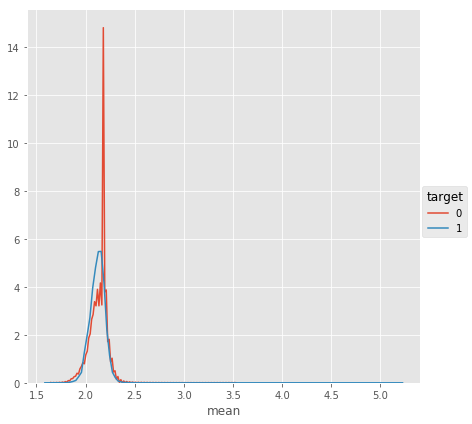

In [51]:
sns.FacetGrid(df_train, hue="target", size=6) \
   .map(sns.kdeplot, "mean") \
   .add_legend()

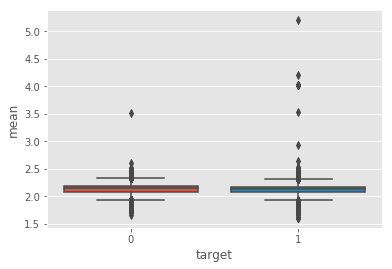

In [52]:
import seaborn as sns

sns.boxplot(x="target", y="mean", data=df_train)



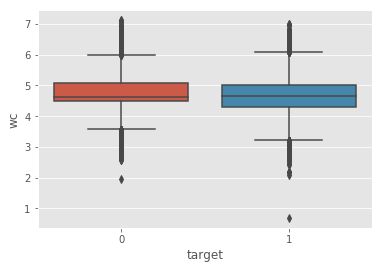

In [53]:
sns.boxplot(x="target", y="wc", data=df_train)

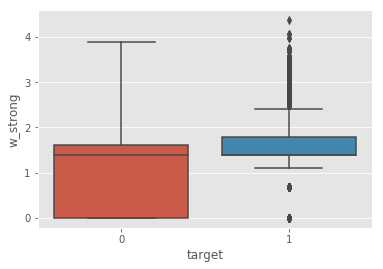

In [54]:
sns.boxplot(x="target", y="w_strong", data=df_train)

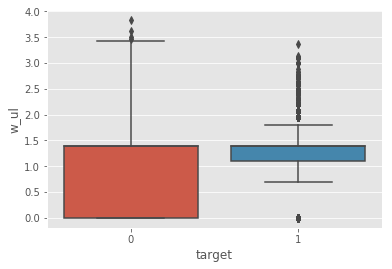

In [55]:
sns.boxplot(x="target", y="w_ul", data=df_train)

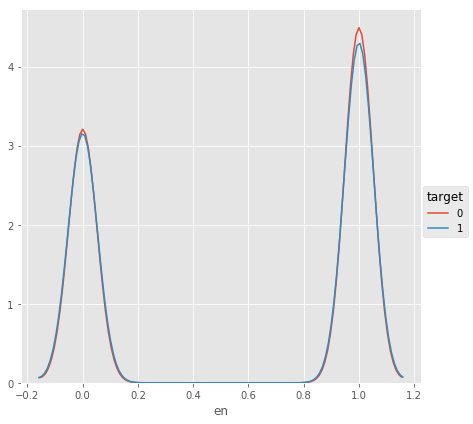

In [57]:
sns.FacetGrid(df_train, hue="target", size=6) \
   .map(sns.kdeplot, "en") \
   .add_legend()

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
class DataFrameColumnExtracter(TransformerMixin ,BaseEstimator):

    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]


class DataFrameColumnExtracter_asm(TransformerMixin ,BaseEstimator):

    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column].as_matrix().ravel()
    
class DenseTransformer(BaseEstimator,TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        #return X.todense()
        return X.toarray()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self



In [59]:
df_train.columns

Index(['name', 'description', 'target', 'w_strong', 'w_ul', 'en', 'wc',
       'mean'],
      dtype='object')

In [60]:
col_cat =['en']
col_num_forscale = ['wc', 'mean' , 'w_strong','w_ul']
col_num_without =[]
col_text_vect = ['name']
col_text_vect_tfidf=['description']

In [111]:
pipe_par1 = make_pipeline(
       DataFrameColumnExtracter(col_cat)    
)

pipe_par2 = make_pipeline(
       DataFrameColumnExtracter(col_num_forscale),
       StandardScaler()
)
pipe_par3 = make_pipeline(
       DataFrameColumnExtracter(col_num_without)
)


pipe_par4 = make_pipeline(
       DataFrameColumnExtracter_asm(col_text_vect),
       CountVectorizer(max_features = 300 , max_df=0.95 , ngram_range =(1,2)),
       DenseTransformer()
)

pipe_par5 = make_pipeline(
       DataFrameColumnExtracter_asm(col_text_vect_tfidf),
       TfidfVectorizer( max_features = 4000, max_df=0.95, min_df =0.05,  ngram_range =(1,3), stop_words=['и',
'в',
'во',
'не',
'что',
'он',
'на',
'я',
'с',
'со',
'как',
'а',
'то',
'все',
'она',
'так',
'его',
'но',
'да',
'ты',
'к',
'у',
'же',
'вы',
'за',
'бы',
'по',
'только',
'ее',
'мне',
'было ',
'вот',
'от',
'меня',
'еще',
'нет',
'о',
'из',
'ему',
'теперь',
'когда',
'даже ',
'ну',
'вдруг',
'ли',
'если ',
'уже',
'или',
'ни',
'быть ',
'был',
'него ',
'до',
'вас',
'нибудь ',
'опять',
'уж',
'вам',
'сказал ',
'ведь ',
'там',
'потом',
'себя ',
'ничего',
'ей',
'может',
'они',
'тут',
'где',
'есть ',
'надо ',
'ней',
'для',
'мы',
'тебя ',
'их',
'чем',
'была',
'сам',
'чтоб ',
'без',
'будто',
'чего ',
'раз',
'тоже ',
'себе ',
'под',
'жизнь',
'будет',
'ж',
'тогда',
'кто',
'этот ',
'говорил',
'того ',
'потому ',
'этого',
'какой',
'совсем',
'ним',
'здесь',
'этом ',
'один ',
'почти',
'мой',
'тем',
'чтобы',
'нее',
'кажется',
'сейчас ',
'были ',
'куда ',
'зачем',
'сказать',
'всех ',
'никогда',
'сегодня',
'можно',
'при',
'наконец',
'два',
'об',
'другой ',
'хоть ',
'после',
'над',
'больше ',
'тот',
'через',
'эти',
'нас',
'про',
'всего',
'них',
'какая',
'много',
'разве',
'сказала',
'три',
'эту',
'моя']),
       DenseTransformer()
)


feature_union = make_union(pipe_par1,pipe_par2,pipe_par3,pipe_par4, pipe_par5)


In [112]:
from sklearn.decomposition import PCA

In [38]:
#t=feature_union.fit_transform(df_train)
#print(t.shape)


(200000, 3752)


In [ ]:
#print(PCA(n_components=0.98).fit_transform(t).shape)

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA

In [114]:
from sklearn.pipeline import Pipeline
xgb_model = xgb.XGBClassifier()

pipe= Pipeline([('f', feature_union), ('p' , PCA(n_components=0.98)) , ('x', xgb_model)])
pipe


Pipeline(memory=None,
     steps=[('f', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('dataframecolumnextracter', DataFrameColumnExtracter(column=['en']))])), ('pipeline-2', Pipeline(memory=None,
     steps=[('dataframecolumnextracter', DataFrameColumnExtracter(column=['wc',...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [116]:
parameters = {
              'x__max_depth': [8],
              'x__n_estimators': [500] ,
               'x__min_child_weight':[1] ,
               'x__subsample' :[0.8],
               'x__reg_alpha':[1e-5]}

In [ ]:
clf = GridSearchCV(pipe, parameters,  
                   cv=3, 
                   scoring='roc_auc', n_jobs=4)


In [ ]:
clf.fit(df_train.drop(columns=['target']), df_train['target'])

#trust your CV!
print(clf.best_score_ , clf.best_params_)


In [123]:

#trust your CV!
print(clf.best_score_ , clf.best_params_)


0.9924141945168103 {'x__max_depth': 8, 'x__min_child_weight': 1, 'x__n_estimators': 500, 'x__reg_alpha': 1e-05, 'x__subsample': 0.8}


In [ ]:
df_test=pd.read_hdf('df_test_2.h5','df')
test_probs = clf.predict_proba(df_test)[:,1]


In [ ]:
sample = pd.read_csv('./sampleSubmission.csv')
sample.target = test_probs


In [ ]:
sample.to_csv("xxx_best_parameter_submission_20.csv", index = False)

train 0.990831197216482 {'x__max_depth': 6, 'x__n_estimators': 200}   test on lb: 0.99109

train 0.9914401896868643 {'x__max_depth': 7, 'x__n_estimators': 250} test on lb: 0.99183

0.992044197708173 {'x__max_depth': 8, 'x__n_estimators': 300}      test on lb: 0.99255

0.9920852444313597 {'x__max_depth': 8, 'x__min_child_weight': 1, 'x__n_estimators': 300, 'x__subsample': 0.8}   : lb 0.99259

0.9924141945168103 {'x__max_depth': 8, 'x__min_child_weight': 1, 'x__n_estimators': 500, 'x__reg_alpha': 1e-05, 'x__subsample': 0.8}